In [21]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [22]:
df = pd.read_excel("data.xls")


In [23]:
# Data Preprocessing

cols = ['_id', 'battery', 'distance', 'location', 'name', 'source', 'ward_id']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('time')

   
df['time'] = pd.to_datetime(df['time'], unit='ms')


df = df[['time','pm25']]
df.isnull().sum()

time    0
pm25    0
dtype: int64

In [24]:
df.describe

df.head()

,time,pm25
0,2019-07-01 18:30:26,19
1,2019-07-01 18:31:26,15
2,2019-07-01 18:32:26,13
3,2019-07-01 18:33:27,15
4,2019-07-01 18:34:27,15


In [25]:
test1=df[7500:]
test_xcoord = test1['time'].dt.time.to_numpy()
test_xcoord

array([datetime.time(0, 14, 34), datetime.time(0, 15, 34),
       datetime.time(0, 16, 34), datetime.time(0, 17, 34),
       datetime.time(0, 18, 34), datetime.time(0, 19, 34),
       datetime.time(0, 20, 34), datetime.time(0, 21, 34),
       datetime.time(0, 22, 34), datetime.time(0, 23, 34),
       datetime.time(0, 24, 33), datetime.time(0, 25, 33),
       datetime.time(0, 26, 33), datetime.time(0, 27, 33),
       datetime.time(0, 28, 33), datetime.time(0, 29, 33),
       datetime.time(0, 30, 33), datetime.time(0, 31, 33),
       datetime.time(0, 32, 33), datetime.time(0, 33, 33),
       datetime.time(0, 34, 33), datetime.time(0, 35, 33),
       datetime.time(0, 36, 33), datetime.time(0, 37, 33),
       datetime.time(0, 38, 33), datetime.time(0, 39, 33),
       datetime.time(0, 40, 33), datetime.time(0, 41, 33),
       datetime.time(0, 42, 33), datetime.time(0, 43, 33),
       datetime.time(0, 44, 33), datetime.time(0, 45, 33),
       datetime.time(0, 46, 33), datetime.time(0, 47, 33

In [26]:
df = df.set_index('time')
df = df.resample('1H').mean()

df.index
df.describe()
train=df[0:126] 
test=df[126:]
train.head()
df.index
len(df)

138

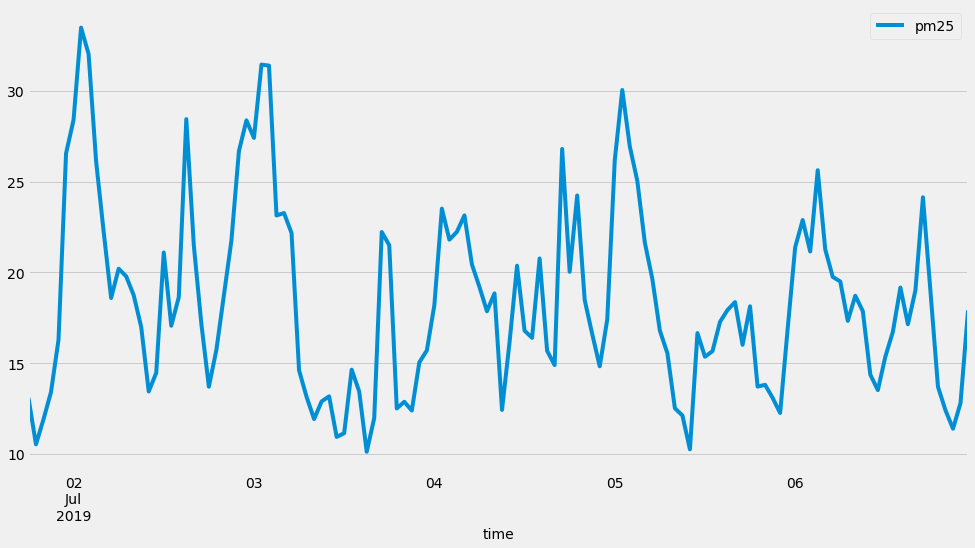

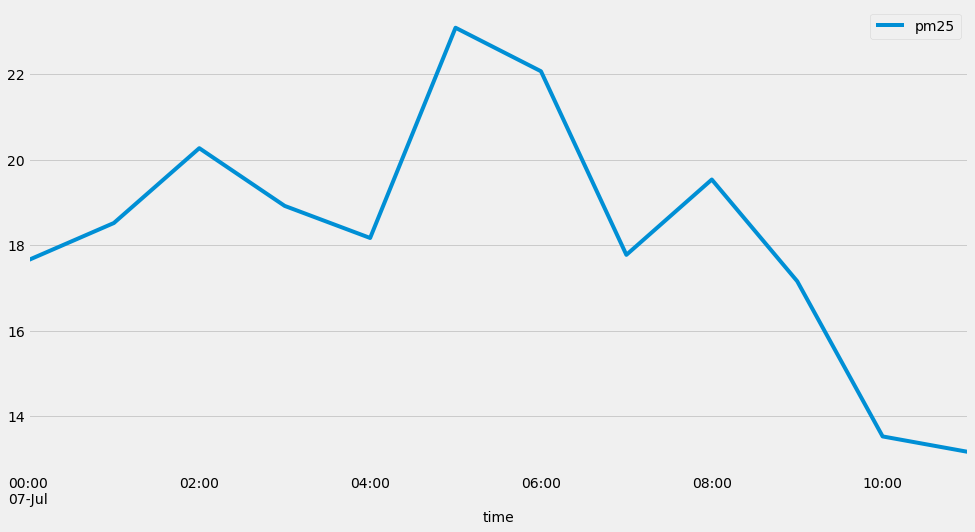

time
2019-07-01 18:00:00    13.100000
2019-07-01 19:00:00    10.540984
2019-07-01 20:00:00    11.916667
2019-07-01 21:00:00    13.416667
2019-07-01 22:00:00    16.295082
                         ...    
2019-07-07 07:00:00    17.771930
2019-07-07 08:00:00    19.533333
2019-07-07 09:00:00    17.155172
2019-07-07 10:00:00    13.525424
2019-07-07 11:00:00    13.163636
Freq: H, Name: pm25, Length: 138, dtype: float64

In [27]:
train.plot(figsize=(15,8), fontsize=14)
test.plot(figsize=(15,8), fontsize=14)
plt.show()
y= df['pm25']
y

In [33]:
test

,pm25
time,
2019-07-07 00:00:00,17.650000
2019-07-07 01:00:00,18.516667
2019-07-07 02:00:00,20.266667
2019-07-07 03:00:00,18.916667
2019-07-07 04:00:00,18.166667
2019-07-07 05:00:00,23.083333
2019-07-07 06:00:00,22.065574
2019-07-07 07:00:00,17.771930
2019-07-07 08:00:00,19.533333


In [28]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [29]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1199.8902518932232
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1009.8579746025343
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:846.2854722900704
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:678.4391962410235
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:847.5021777524078
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:759.7587758189594
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:683.9297040868792
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:664.7708303868454
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1033.283657273165
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:870.9937519861426
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:771.4882489884985
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:614.360286261362
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:776.423783231115
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:691.308232926148
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:643.5410468120728
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:610.6315029612487
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:743.4059332874793
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:676.1857272794405
ARIMA(0, 1,

In [30]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 1, 4),
                                seasonal_order=(0,1,1,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8429      0.239      3.521      0.000       0.374       1.312
ar.L2         -0.4706      0.207     -2.268      0.023      -0.877      -0.064
ma.L1         -1.0401     89.834     -0.012      0.991    -177.112     175.031
ma.L2          0.3254      3.684      0.088      0.930      -6.895       7.546
ma.L3          0.1555     25.623      0.006      0.995     -50.065      50.376
ma.L4         -0.4408     39.541     -0.011      0.991     -77.941      77.059
ma.S.L7       -1.0000    557.285     -0.002      0.999   -1093.258    1091.258
sigma2        10.5144   5927.618      0.002      0.999   -1.16e+04    1.16e+04


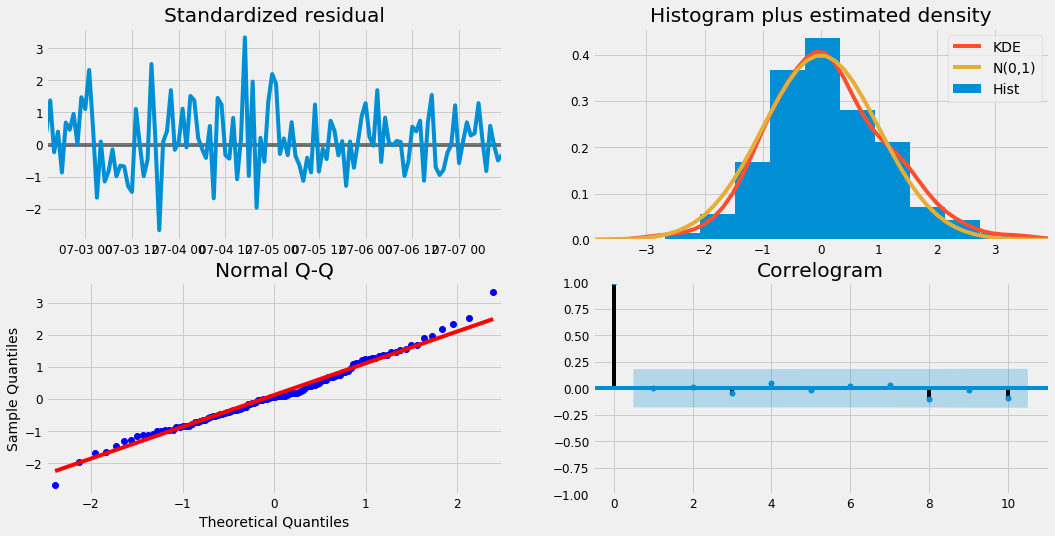

In [31]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

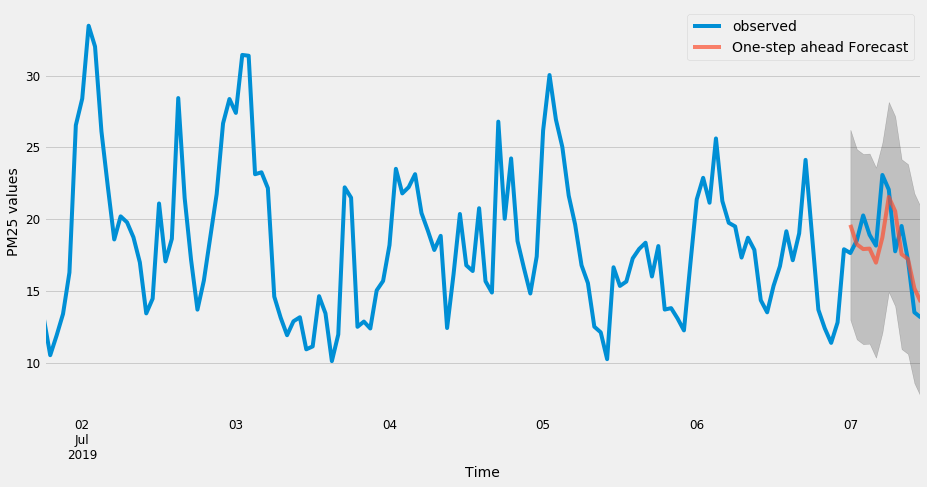

In [34]:
pred = results.get_prediction(start='2019-07-07 00:00:00', dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time')
ax.set_ylabel('PM25 values')
plt.legend()
plt.show()

In [35]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-07-07 00:00:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()


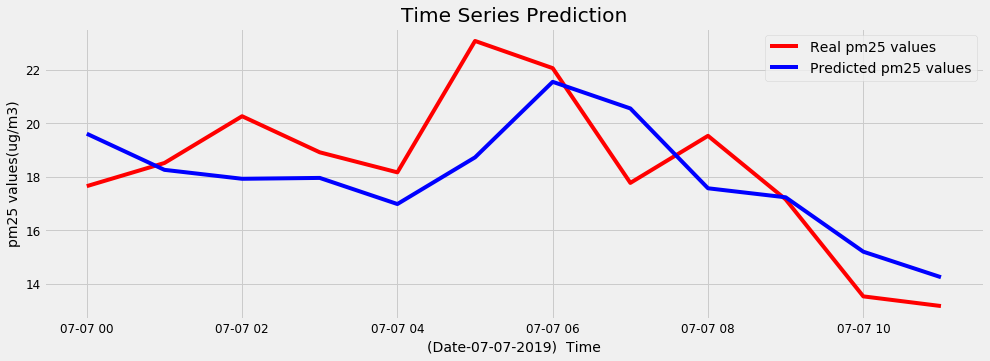

The Mean Squared Error of our forecasts is 3.88


In [38]:
plt.figure(figsize=(15,5))
plt.plot(y_truth, color = 'red', label = 'Real pm25 values')
plt.plot(y_forecasted, color = 'blue', label = 'Predicted pm25 values')
plt.title('Time Series Prediction')
plt.xlabel('(Date-07-07-2019)  Time')
plt.ylabel('pm25 values(ug/m3)')
plt.legend()
plt.show()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [37]:
pd.to_datetime(1562458474000,unit='ms')

Timestamp('2019-07-07 00:14:34')